## Loading Packages

In [964]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVR

## Real Estate API Function

In [965]:
# from realestate_com_au import RealestateComAu
#
# api = RealestateComAu()
#
# # Get property listings
# listings = api.search(locations=["NSW"], channel="sold")


In [966]:
# count = 0
# for list in listings:
#     count += 1
#
# print(listings[0].id)
# type(listings[0].id)
# print(count)

In [967]:
# columns = ['id', 'url', 'suburb', 'state', 'postcode', 'short_address', 'full_address', 'property_type', 'price', 'bedrooms', 'bathrooms', 'parking_spaces', 'building_size', 'building_size_unit', 'land_size', 'land_size_unit', 'listing_company_id', 'listing_company_name', 'listing_company_phone', 'auction_date', 'sold_date', 'description', 'listers']
#
# df = pd.DataFrame(listings)
#
# print(df)

## Loading Dataset

In [968]:
df = pd.read_csv("real_sold2.csv")

In [969]:
#df.to_csv(r'C:\Users\sasmi\Desktop\Data Projects\Real estate project\real_sold2.csv', index = False)

In [970]:
# str(type(listings[0].bedrooms))

## Data Overview

In [971]:
df.head()

,id,url,suburb,state,postcode,short_address,full_address,property_type,price,bedrooms,...,building_size_unit,land_size,land_size_unit,listing_company_id,listing_company_name,listing_company_phone,auction_date,sold_date,description,listers
0,138447879,https://www.realestate.com.au/sold/property-ho...,Picnic Point,NSW,2213,875 Henry Lawson Drive,"875 Henry Lawson Drive, Picnic Point, NSW 2213",house,2870000,3.0,...,NaN,2144.0,m²,XPNPAD,Professionals - Padstow,0297714555,NaN,20 Feb 2022,The Biggest Block on the Market<br/><br/>The o...,"[{'id': '926099', 'name': 'Jonathan Watson', '..."
1,138341543,https://www.realestate.com.au/sold/property-ho...,Kanahooka,NSW,2530,11 Murra Murra Road,"11 Murra Murra Road, Kanahooka, NSW 2530",house,1750000,3.0,...,NaN,650.0,m²,MDCXAH,McGrath - Brighton Le Sands,0285799788,NaN,20 Feb 2022,Commanding breathtaking Lake Illawarra views f...,"[{'id': '1633650', 'name': 'Michael Flevaris',..."
2,138284202,https://www.realestate.com.au/sold/property-ho...,Acacia Gardens,NSW,2763,21 Chase Drive,"21 Chase Drive, Acacia Gardens, NSW 2763",house,1400000,6.0,...,NaN,535.0,m²,CSEGKD,Ray White Quakers Hill - The Tesolin Group,0286622763,NaN,20 Feb 2022,SOLD BY OWNER OF RAY WHITE QUAKERS HILL JOSH T...,"[{'id': '2559826', 'name': 'Josh Tesolin', 'ag..."
3,138387091,https://www.realestate.com.au/sold/property-ho...,Schofields,NSW,2762,40A St Albans Road,"40A St Albans Road, Schofields, NSW 2762",house,1100000,6.0,...,NaN,634.0,m²,CSEGKD,Ray White Quakers Hill - The Tesolin Group,0286622763,NaN,20 Feb 2022,SOLD BY OWNER OF RAY WHITE QUAKERS HILL JOSH T...,"[{'id': '2559826', 'name': 'Josh Tesolin', 'ag..."
4,138360091,https://www.realestate.com.au/sold/property-ho...,Marayong,NSW,2148,6 & 6A Pegar Place,"6 & 6A Pegar Place, Marayong, NSW 2148",house,1073500,5.0,...,NaN,607.0,m²,CSEGKD,Ray White Quakers Hill - The Tesolin Group,0286622763,NaN,20 Feb 2022,SOLD AT AUCTION BY OWNER OF RAY WHITE QUAKERS ...,"[{'id': '2559826', 'name': 'Josh Tesolin', 'ag..."


In [972]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1000 non-null   int64  
 1   url                    1000 non-null   object 
 2   suburb                 1000 non-null   object 
 3   state                  1000 non-null   object 
 4   postcode               1000 non-null   int64  
 5   short_address          1000 non-null   object 
 6   full_address           1000 non-null   object 
 7   property_type          1000 non-null   object 
 8   price                  1000 non-null   int64  
 9   bedrooms               972 non-null    float64
 10  bathrooms              972 non-null    float64
 11  parking_spaces         972 non-null    float64
 12  building_size          107 non-null    float64
 13  building_size_unit     107 non-null    object 
 14  land_size              1000 non-null   float64
 15  land_

In [973]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1000.0,1.432715e+08,4.450984e+07,134214678.0,138186746.0,138330944.0,138393971.0,700180674.0
postcode,1000.0,2.346474e+03,2.480645e+02,2000.0,2147.0,2261.0,2539.0,2850.0
price,1000.0,1.272691e+06,8.800548e+05,99000.0,755000.0,1017600.0,1510000.0,9950000.0
bedrooms,972.0,3.273663e+00,1.231749e+00,1.0,3.0,3.0,4.0,16.0
bathrooms,972.0,1.826132e+00,8.065235e-01,1.0,1.0,2.0,2.0,8.0
parking_spaces,972.0,1.861111e+00,1.540477e+00,0.0,1.0,2.0,2.0,20.0
building_size,107.0,1.711130e+02,1.212264e+02,26.0,103.0,139.0,196.0,765.0
land_size,1000.0,3.885343e+02,4.497966e+02,-1.0,-1.0,315.5,648.0,3670.0
auction_date,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


missing value

## Exploratory Data Analysis

<AxesSubplot:>

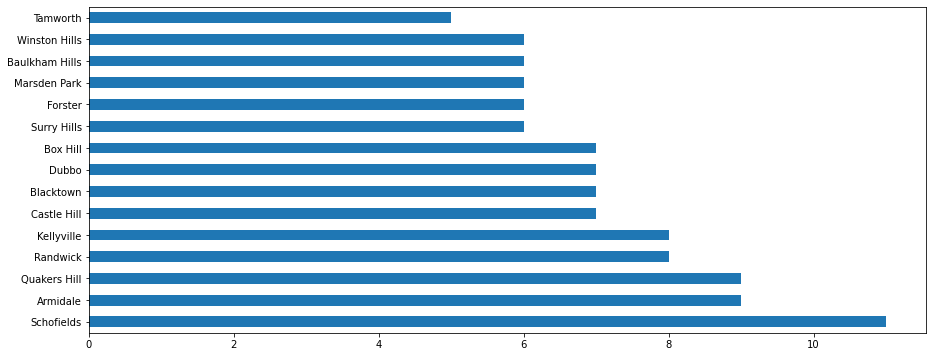

In [974]:
plt.figure(figsize=(15,6))
df["suburb"].value_counts()[:15].plot.barh()

<AxesSubplot:>

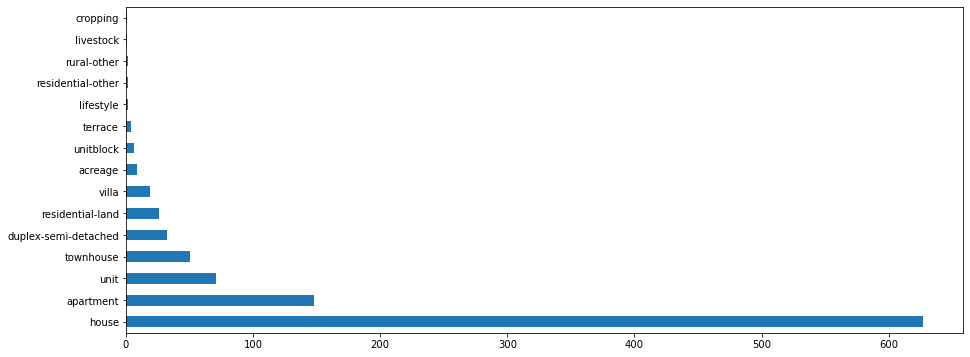

In [975]:
plt.figure(figsize=(15,6))
df["property_type"].value_counts().plot.barh()

In [976]:
data_num = df.select_dtypes(["float64", "int64"]).columns

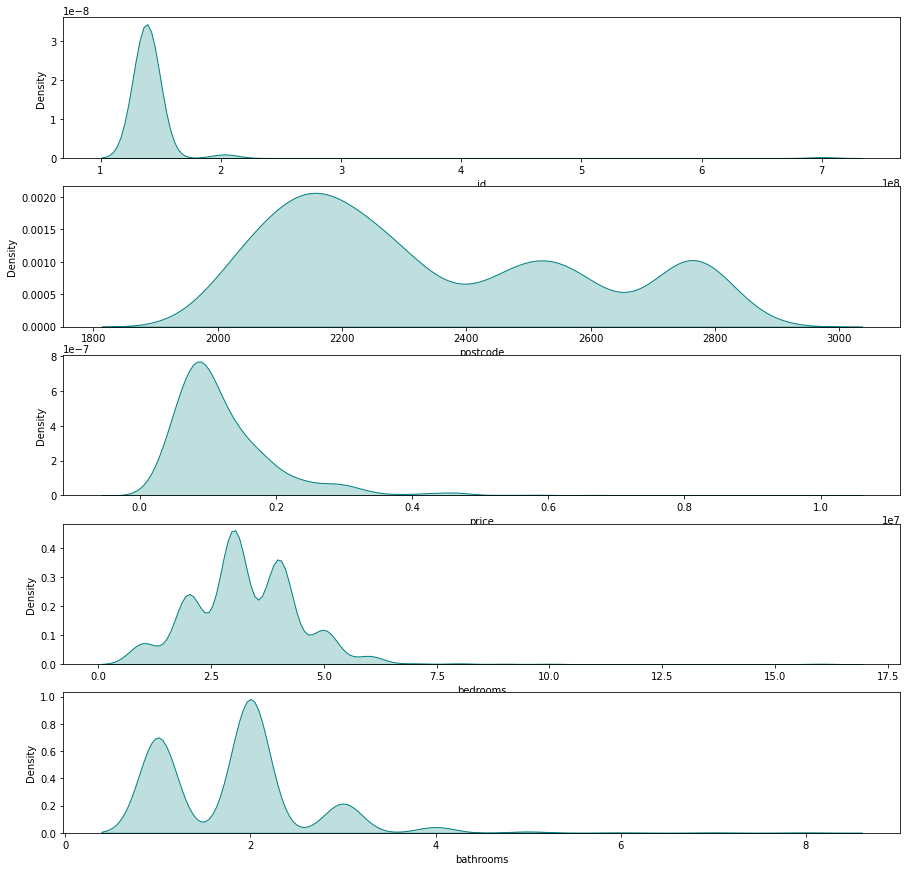

In [977]:
fig, ax = plt.subplots(nrows=5, figsize=(15,15))
count=0
for i in range(5):
    sns.kdeplot(df[data_num[count]], ax=ax[i], shade=True, color="#008080")
    count+=1

<AxesSubplot:xlabel='property_type', ylabel='count'>

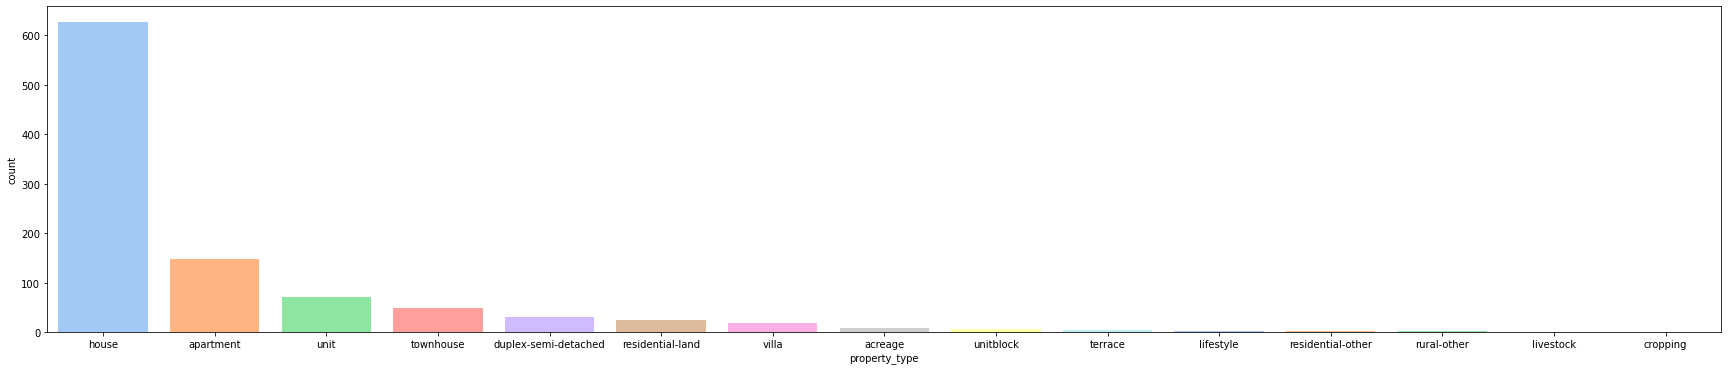

In [978]:
plt.figure(figsize=(30,6))
sns.countplot(df["property_type"], order = df['property_type'].value_counts().index ,saturation=1,palette="pastel")

month to month analysis
year to year analysis
missing heat map months vs years

<AxesSubplot:>

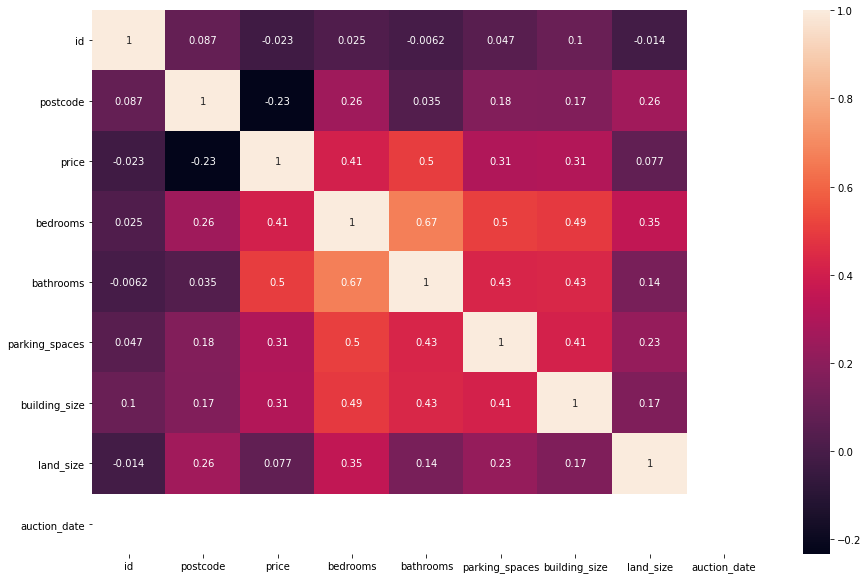

In [979]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),xticklabels=df.corr().columns, yticklabels=df.corr().columns, annot=True)

based of statiscal good practice corr() > 0.50 is a good coefficient
therefore there seems to be good relations price to be beedrooms
followed by bathroom/price or parking_space/price

<Figure size 1080x864 with 0 Axes>

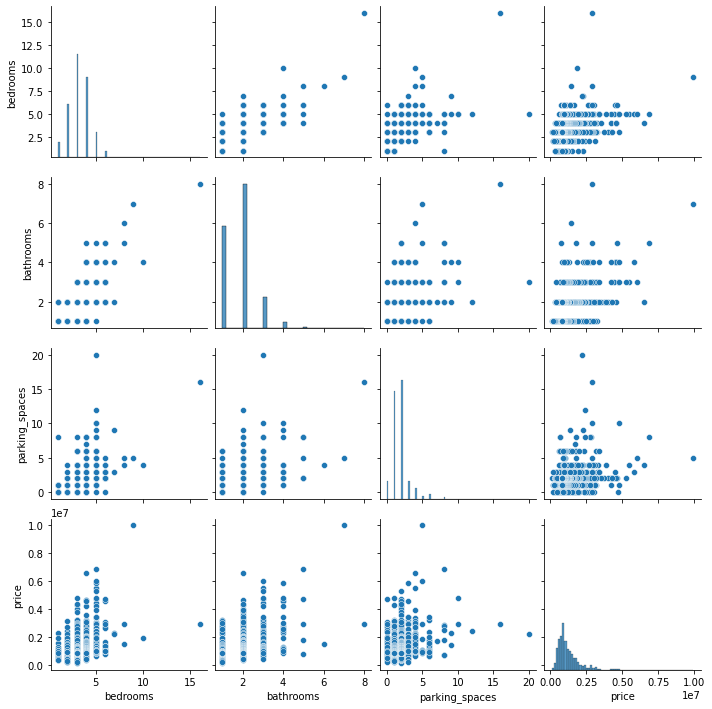

In [980]:
plt.figure(figsize = (15,12))
sns.pairplot(df, vars = ["bedrooms", "bathrooms", "parking_spaces", "price"])

based on correalation scored i made pair plot to see the interaction of these variables to the each other

## Data Wrangling

In [981]:
#average_pricing = df.groupby("suburb")["price"].mean().sort_values()
#find the mean pricing of the houses sort descending order of surburbs
average_pricing = (df.groupby("suburb")["price"].mean().sort_values())[::-1].astype("int")

In [982]:
average_pricing[:5]

suburb
Oatlands              6550000
West Pennant Hills    5690000
Rossmore              5380000
North Manly           5250000
Longueville           4591000
Name: price, dtype: int32

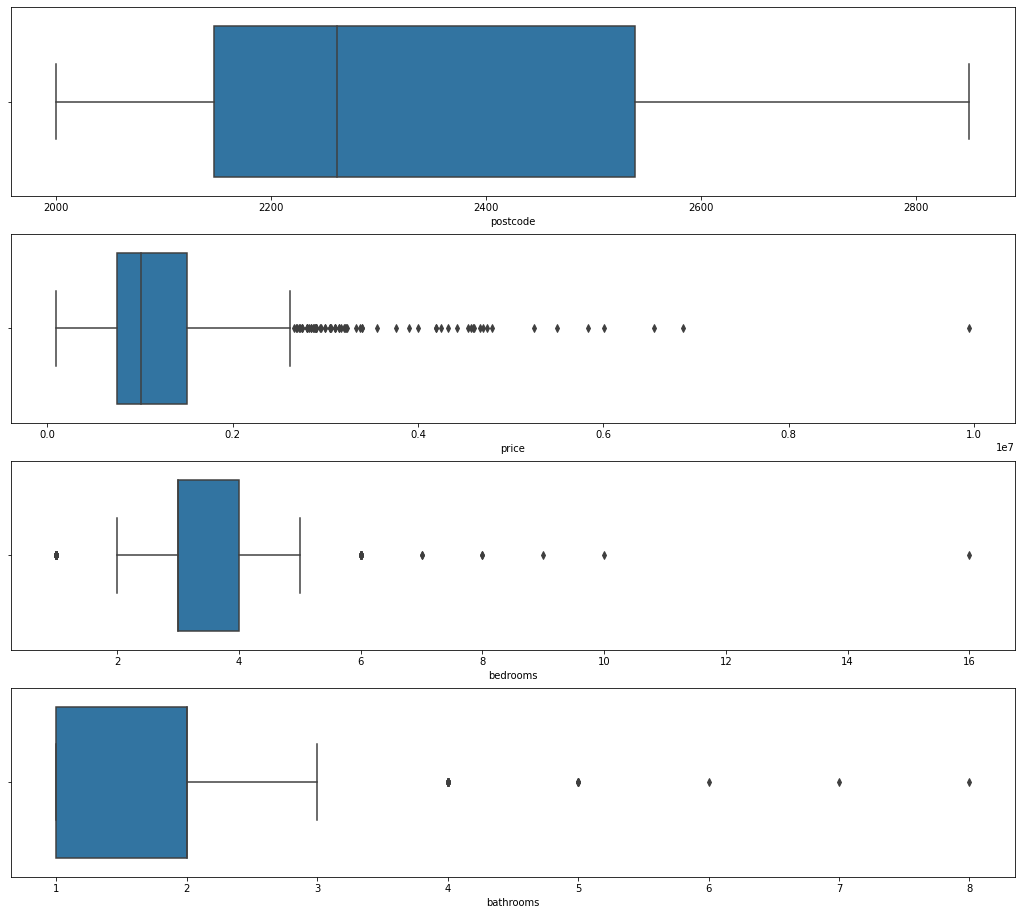

In [983]:
subplot_data = df.drop('id', axis=1).select_dtypes(["int64", "float64"]).columns

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(18,16))

for i in range(4):
    sns.boxplot(x = df[subplot_data[i]], ax=ax[i])
    count = count + 1

In [984]:
lower_and_upper = {}

for col in data_num:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = 1.5*(q3-q1)

    lower_bound = q1-iqr
    upper_bound = q3+iqr

    lower_and_upper[col] = (lower_bound, upper_bound)
    df.loc[(df.loc[:,col]<lower_bound),col]=lower_bound*0.75
    df.loc[(df.loc[:,col]>upper_bound),col]=upper_bound*1.25


lower_and_upper

{'id': (137875908.5, 138704808.5),
 'postcode': (1559.0, 3127.0),
 'price': (-377500.0, 2642500.0),
 'bedrooms': (1.5, 5.5),
 'bathrooms': (-0.5, 3.5),
 'parking_spaces': (-0.5, 3.5),
 'building_size': (-36.5, 335.5),
 'land_size': (-974.5, 1621.5),
 'auction_date': (nan, nan)}

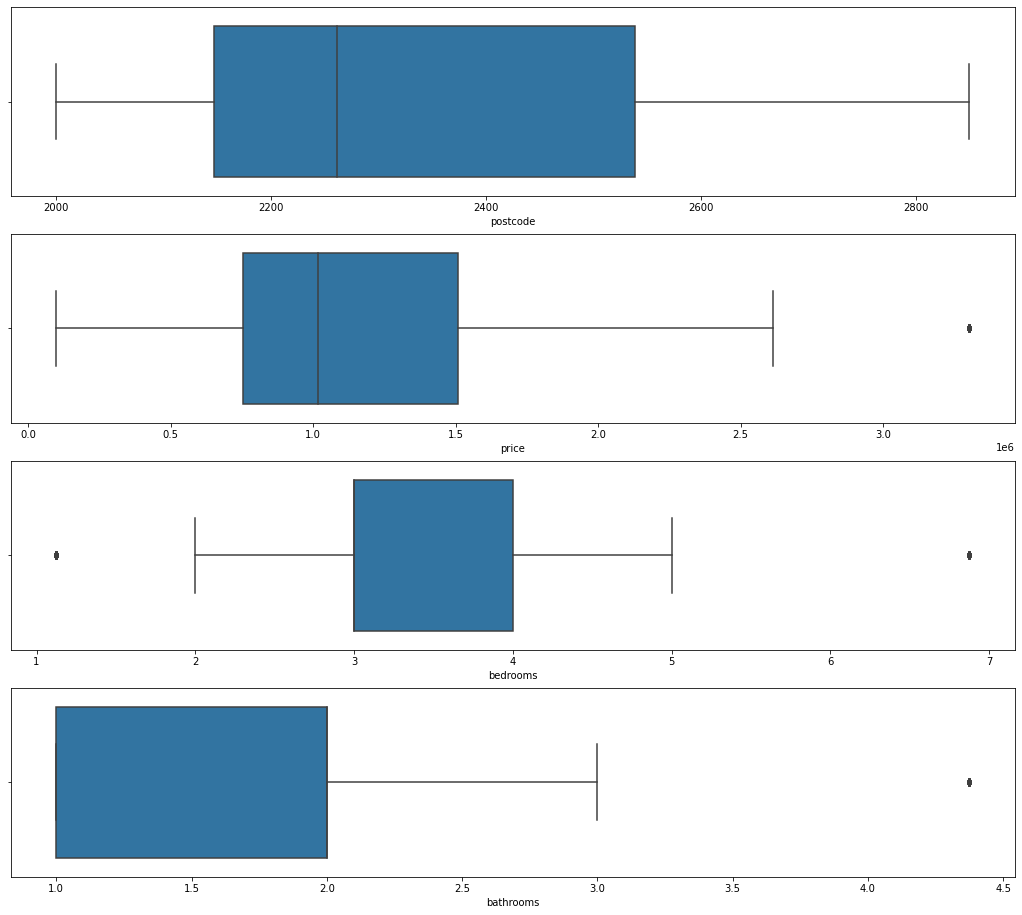

In [985]:
fig, ax =plt.subplots(nrows=4,ncols=1,figsize=(18,16))
for i in range(4):
    sns.boxplot(x = df[subplot_data[i]],ax=ax[i])
    count = count+1

## Missing Data Filings

In [986]:
#pip install missingno

In [987]:
import missingno as msno

<AxesSubplot:>

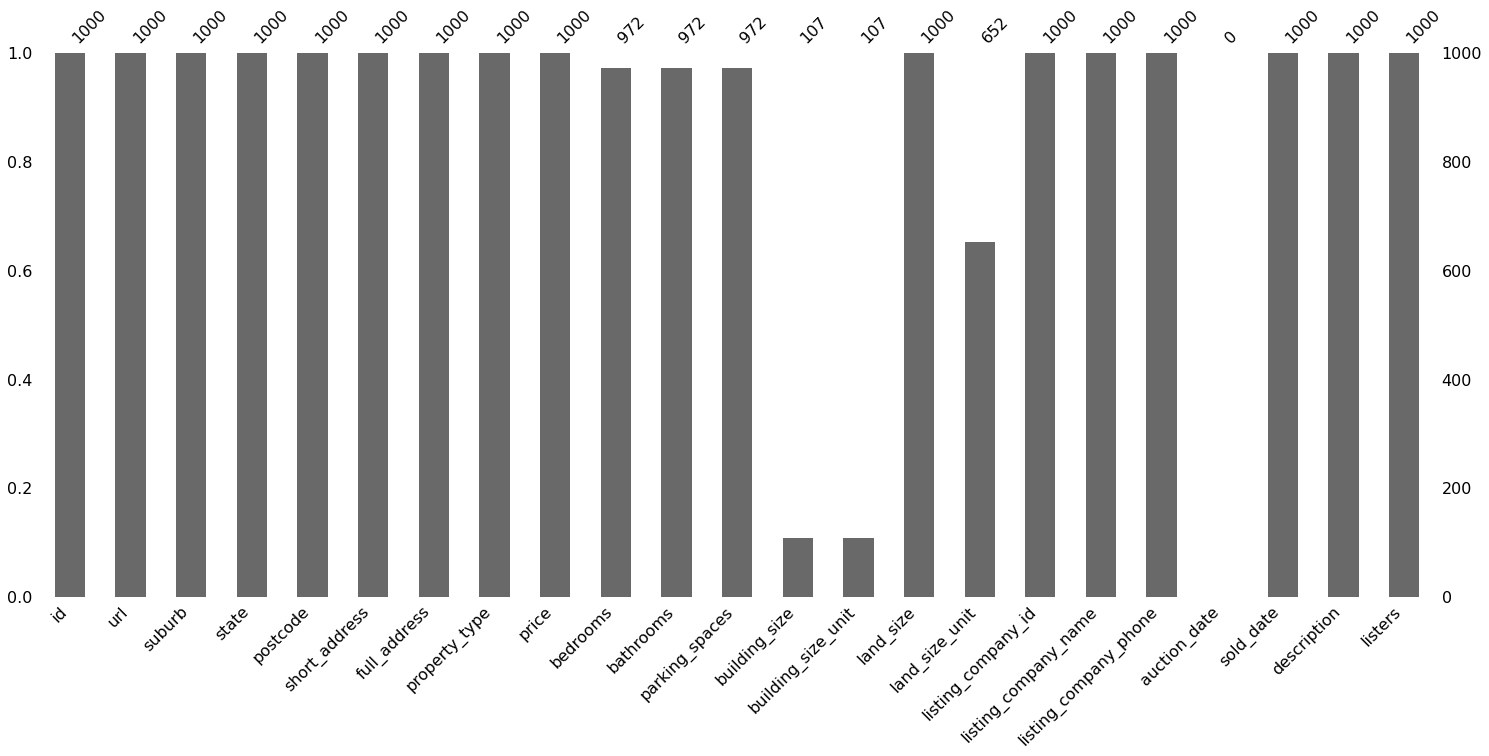

In [988]:
msno.bar(df)

<AxesSubplot:>

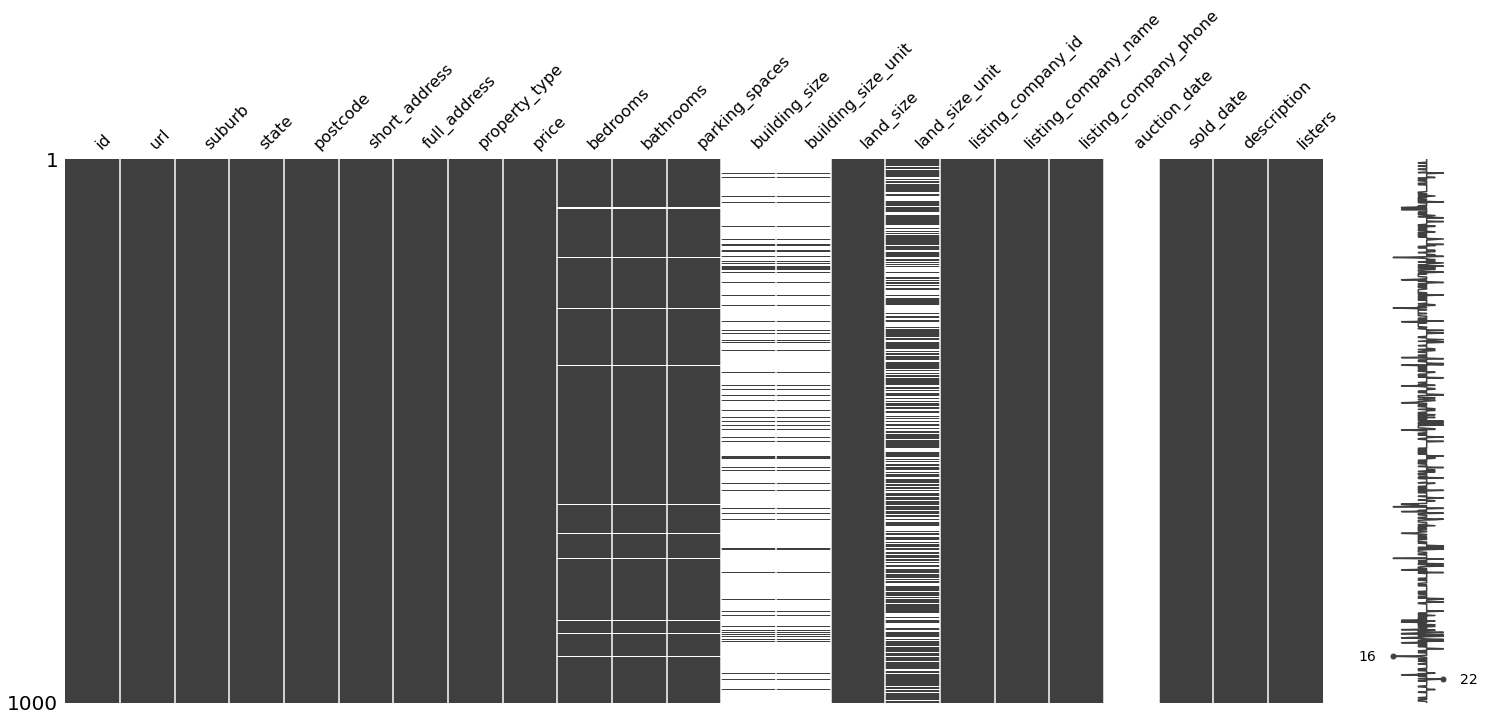

In [989]:
msno.matrix(df)

<AxesSubplot:>

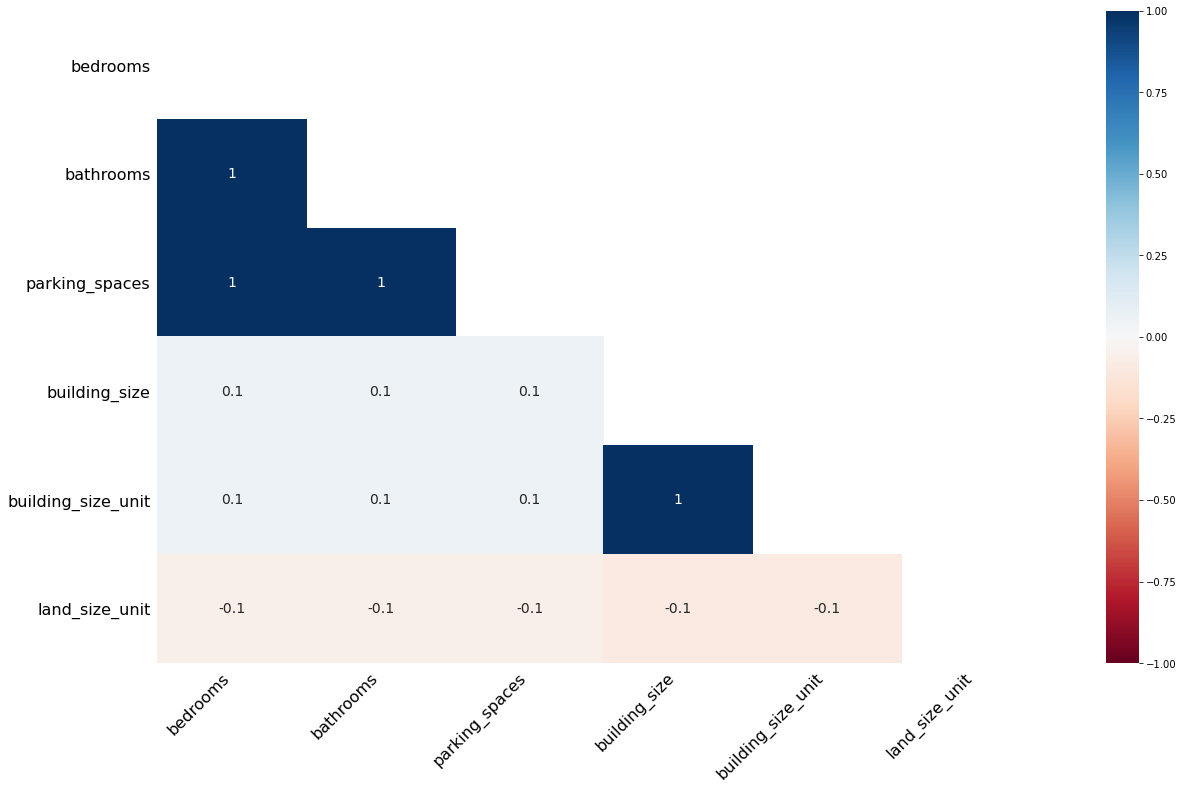

In [990]:
msno.heatmap(df)

In [991]:
from sklearn.impute import KNNImputer
knn_imputer =KNNImputer()

In [992]:
df["bedrooms"] = knn_imputer.fit_transform(df[["bedrooms"]])
df["bathrooms"] = knn_imputer.fit_transform(df[["bathrooms"]])
df["parking_spaces"] = knn_imputer.fit_transform(df[["parking_spaces"]])
df["building_size"] = knn_imputer.fit_transform(df[["building_size"]])

<AxesSubplot:>

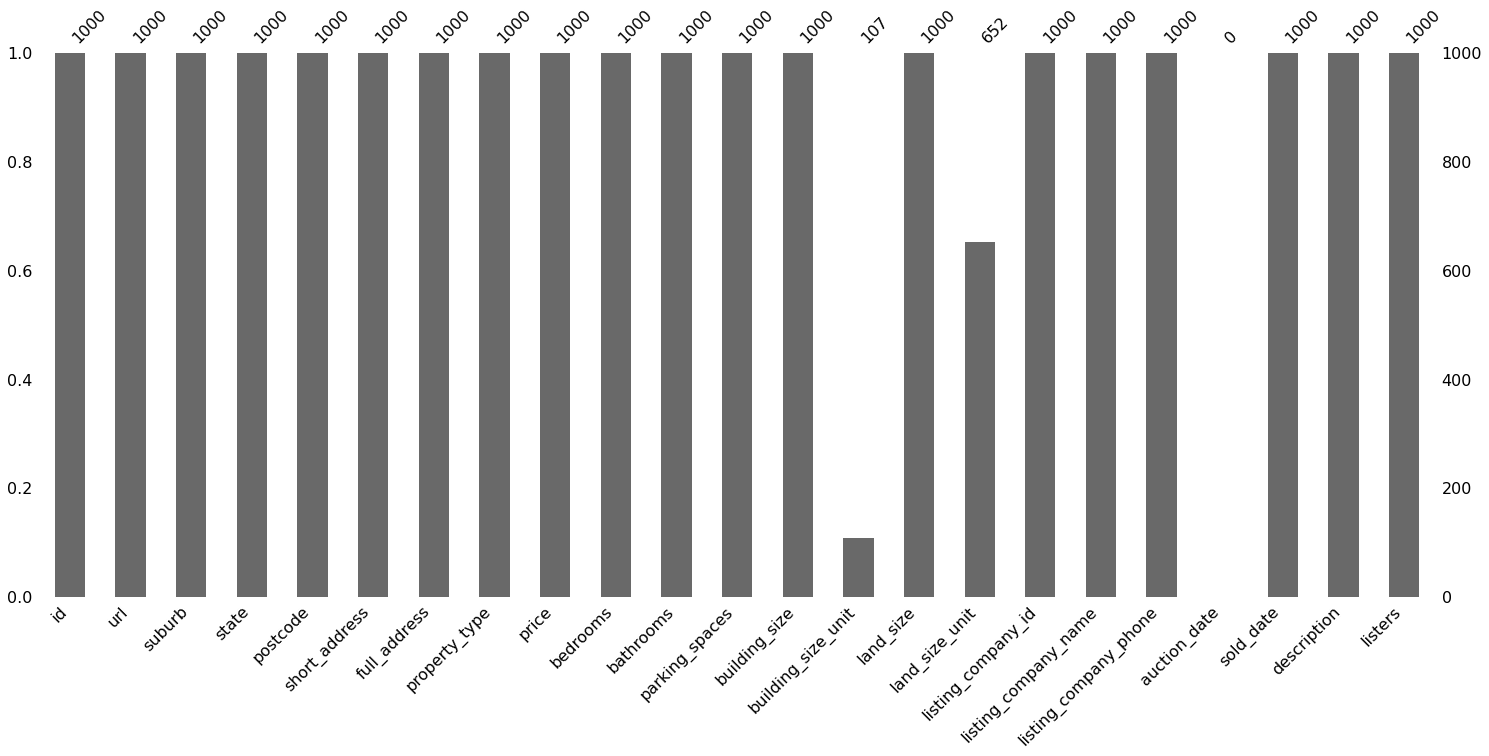

In [993]:
msno.bar(df)

## Building a Model


In [994]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [995]:
#convertion to int from float consider for the rest as well
df["postcode"] = df["postcode"].astype(int)
X = df.drop(["building_size", "building_size_unit", "land_size_unit", "auction_date", "price", "id", "url", "suburb", "state", "short_address", "full_address", "property_type", "listing_company_id", "listing_company_name", "listing_company_phone", "listers", "description", "sold_date"], axis=1)
Y = df["price"]
X = sm.add_constant(X)

In [996]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           1000 non-null   float64
 1   postcode        1000 non-null   int32  
 2   bedrooms        1000 non-null   float64
 3   bathrooms       1000 non-null   float64
 4   parking_spaces  1000 non-null   float64
 5   land_size       1000 non-null   float64
dtypes: float64(5), int32(1)
memory usage: 43.1 KB


In [997]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [998]:
stats_model = sm.OLS(Y_train, X_train).fit()
print(stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     83.53
Date:                Sat, 12 Mar 2022   Prob (F-statistic):           1.63e-70
Time:                        03:57:40   Log-Likelihood:                -11783.
No. Observations:                 800   AIC:                         2.358e+04
Df Residuals:                     794   BIC:                         2.361e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            2.55e+06   2.11e+05     12.

In [999]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           1000 non-null   float64
 1   postcode        1000 non-null   int32  
 2   bedrooms        1000 non-null   float64
 3   bathrooms       1000 non-null   float64
 4   parking_spaces  1000 non-null   float64
 5   land_size       1000 non-null   float64
dtypes: float64(5), int32(1)
memory usage: 43.1 KB


In [1000]:
X.head()

,const,postcode,bedrooms,bathrooms,parking_spaces,land_size
0,1.0,2213,3.000,1.000,4.375,2026.875
1,1.0,2530,3.000,3.000,2.000,650.000
2,1.0,2763,6.875,3.000,2.000,535.000
3,1.0,2762,6.875,4.375,2.000,634.000
4,1.0,2148,5.000,2.000,2.000,607.000


In [1001]:
sklearn_model =LinearRegression().fit(X_train, Y_train)

In [1002]:
cross_val_score(sklearn_model, X_train, Y_train, cv=10, scoring="r2").mean()

0.3086738163001689

In [1003]:
from sklearn.metrics import mean_squared_error

In [1004]:
print("Train RMSE : ",np.sqrt(mean_squared_error(Y_train,sklearn_model.predict(X_train))))
print("Test RMSE : ",np.sqrt(mean_squared_error(Y_test,sklearn_model.predict(X_test))))

Train RMSE :  603130.5871375005
Test RMSE :  581068.939575392


## Random Forest Regressor

In [1005]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(criterion='mse', random_state=0, n_estimators=600, n_jobs=-1, max_features='sqrt')

In [1006]:
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(criterion='mse', max_features='sqrt', n_estimators=600,
                      n_jobs=-1, random_state=0)

In [1007]:
rf_pred = rf_regressor.predict(X_test)

Text(0.5, 0, 'Predicted price')

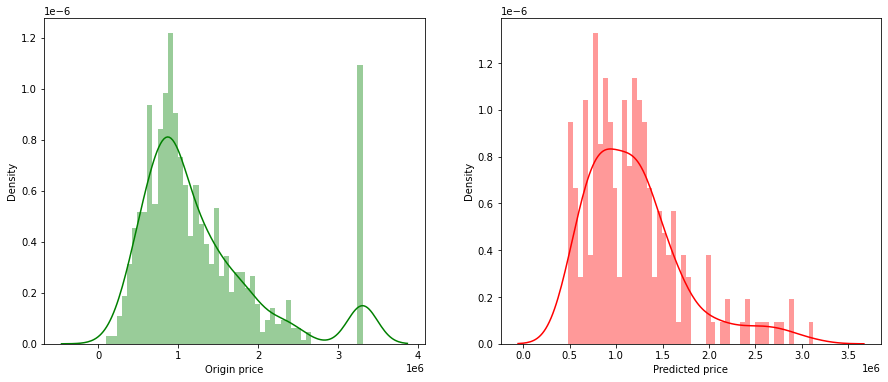

In [1008]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df['price'], bins=50, color='green')
plt.xlabel('Origin price')
plt.subplot(1,2,2)
sns.distplot(rf_pred, bins=50, color='red')
plt.xlabel('Predicted price')

In [1009]:
# mean squared error
mean_squared_error(Y_test, rf_pred)

205993620226.53845

In [1010]:
# r2 score
r2_score(Y_test, rf_pred)

0.6204902707437631

## MinMaxScaler on Data

we want to minimise error in the model so we can implement the normalisation technique to MinMax Scaling

In [1011]:
dff = pd.get_dummies(df, columns = ["suburb", "property_type"], prefix=["suburb", "property_type"])

In [1012]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range= (0,1))
array = list(dff.select_dtypes(include=["float64", "int64"]))
dff.loc[:, array] = scaler.fit_transform(dff.loc[:,array])

dff["bedrooms"] = knn_imputer.fit_transform(dff[["bedrooms"]])
dff["parking_spaces"] = knn_imputer.fit_transform(dff[["parking_spaces"]])

In [1013]:
X = dff.select_dtypes(include=["float64", "int64"]).drop(["price", "id", "auction_date", "building_size"], axis= 1)


In [1014]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedrooms        1000 non-null   float64
 1   bathrooms       1000 non-null   float64
 2   parking_spaces  1000 non-null   float64
 3   land_size       1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [1015]:
X.head()

,bedrooms,bathrooms,parking_spaces,land_size
0,0.326087,0.000000,1.000000,1.000000
1,0.326087,0.592593,0.457143,0.321026
2,1.000000,0.592593,0.457143,0.264316
3,1.000000,1.000000,0.457143,0.313136
4,0.673913,0.296296,0.457143,0.299821


In [1016]:
Y = dff["price"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [1017]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bedrooms        1000 non-null   float64
 1   bathrooms       1000 non-null   float64
 2   parking_spaces  1000 non-null   float64
 3   land_size       1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [1018]:
sklearn_model=LinearRegression().fit(X,Y)
print("R2 Score :",r2_score(Y_train,sklearn_model.predict(X_train)))
print("Train RMSE : ",np.sqrt(mean_squared_error(Y_train,sklearn_model.predict(X_train))))
print("Test RMSE: ",np.sqrt(mean_squared_error(Y_test,sklearn_model.predict(X_test))));

R2 Score : 0.23595033013233502
Train RMSE :  0.20325578780788642
Test RMSE:  0.19517702732075115


## DESCRIPTION LINEAR REGRESSOR


### Pre-processing text features

In [1019]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1000 non-null   float64
 1   url                    1000 non-null   object 
 2   suburb                 1000 non-null   object 
 3   state                  1000 non-null   object 
 4   postcode               1000 non-null   int32  
 5   short_address          1000 non-null   object 
 6   full_address           1000 non-null   object 
 7   property_type          1000 non-null   object 
 8   price                  1000 non-null   int64  
 9   bedrooms               1000 non-null   float64
 10  bathrooms              1000 non-null   float64
 11  parking_spaces         1000 non-null   float64
 12  building_size          1000 non-null   float64
 13  building_size_unit     107 non-null    object 
 14  land_size              1000 non-null   float64
 15  land_

In [1020]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from tqdm import tqdm

#preprocessing property description
stopwords = set(stopwords.words('english'))

def preprocess_desc(text_col):
    preprocessed_descs = []
    for sentence in tqdm(text_col.values):
        sent = sentence.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('<br/><br/>', ' ')
        sent = sent.replace('/<br/>', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = ' '.join(e for e in sent.split() if e not in stopwords)
        preprocessed_descs.append(sent.lower().strip())
    return preprocessed_descs

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sasmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1021]:
df_test = df.copy(deep= True)

In [1022]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1000 non-null   float64
 1   url                    1000 non-null   object 
 2   suburb                 1000 non-null   object 
 3   state                  1000 non-null   object 
 4   postcode               1000 non-null   int32  
 5   short_address          1000 non-null   object 
 6   full_address           1000 non-null   object 
 7   property_type          1000 non-null   object 
 8   price                  1000 non-null   int64  
 9   bedrooms               1000 non-null   float64
 10  bathrooms              1000 non-null   float64
 11  parking_spaces         1000 non-null   float64
 12  building_size          1000 non-null   float64
 13  building_size_unit     107 non-null    object 
 14  land_size              1000 non-null   float64
 15  land_

In [1023]:
df_test["description"] = preprocess_desc(df["description"])

100%|██████████| 1000/1000 [00:00<00:00, 6720.47it/s]


In [1024]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1000 non-null   float64
 1   url                    1000 non-null   object 
 2   suburb                 1000 non-null   object 
 3   state                  1000 non-null   object 
 4   postcode               1000 non-null   int32  
 5   short_address          1000 non-null   object 
 6   full_address           1000 non-null   object 
 7   property_type          1000 non-null   object 
 8   price                  1000 non-null   int64  
 9   bedrooms               1000 non-null   float64
 10  bathrooms              1000 non-null   float64
 11  parking_spaces         1000 non-null   float64
 12  building_size          1000 non-null   float64
 13  building_size_unit     107 non-null    object 
 14  land_size              1000 non-null   float64
 15  land_

In [1025]:
df_test.description.head()

0    the biggest block market the one thing making ...
1    commanding breathtaking lake illawarra views e...
2    sold by owner of ray white quakers hill josh t...
3    sold by owner of ray white quakers hill josh t...
4    sold at auction by owner of ray white quakers ...
Name: description, dtype: object

WIll rename non describe proprty types at other

In [1026]:
#rename = ["villa": "other", "acreage property_type": "other", "unitblock": "other", "terrace": "other", "residential-other": "other", "lifestyle": "other", "rural-other": "other", "livestock": "other", "cropping": "other"]

df_test["property_type"].replace({"villa": "other", "acreage property_type": "other", "unitblock": "other", "terrace": "other", "residential-other": "other", "lifestyle": "other", "rural-other": "other", "livestock": "other", "cropping": "other", "acreage": "other"}, inplace=True)

<AxesSubplot:xlabel='property_type', ylabel='count'>

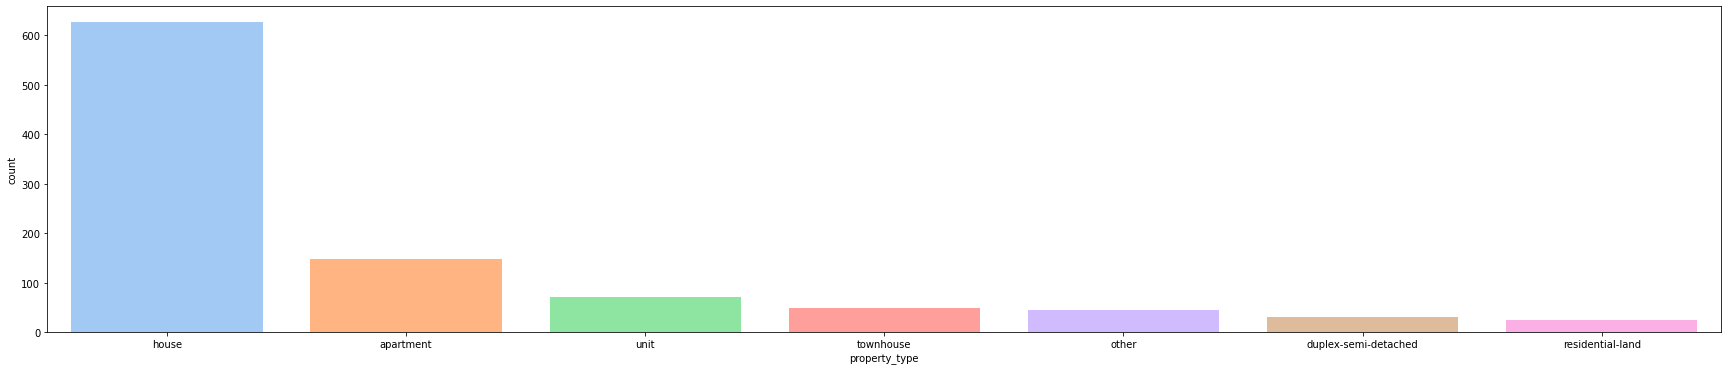

In [1027]:
plt.figure(figsize=(30,6))
sns.countplot(df_test["property_type"], order = df_test['property_type'].value_counts().index ,saturation=1,palette="pastel")

In [1028]:
y_value = np.log1p(df_test['price'])
df_test.drop(['price'], axis=1, inplace=True)

train_df, cv_df, y_train, y_cv = train_test_split(df_test, y_value, test_size=0.2, random_state=42)
print(cv_df.shape)
print(train_df.shape)

(200, 22)
(800, 22)


Saving id of y_cv model for reference

In [1029]:
test_index = cv_df.index

In [1030]:
y_cv

521    14.545472
737    14.377980
740    14.334305
660    13.458837
411    13.710151
         ...    
408    13.715691
332    14.473031
208    13.800398
613    13.715691
78     13.617061
Name: price, Length: 200, dtype: float64

### Converting categorical features to numbers: hot encoding

In [1031]:
from sklearn.feature_extraction.text import CountVectorizer
import random
vectorizer = CountVectorizer(lowercase=False, binary=True)

#whole_hot = vectorizer.fit_transform(df_test["property_type"].values)
#train_df1, cv_df1 = train_test_split(whole_hot,test_size=0.2, random_state=42)
train_type_Hot = vectorizer.fit_transform(train_df["property_type"].values)
cv_type_Hot = vectorizer.fit_transform(cv_df["property_type"].values)

In [1032]:
#print(whole_hot.shape)
print(cv_type_Hot.shape)
print(train_type_Hot.shape)

(200, 10)
(800, 10)


### vectorising the description

In [1033]:
from sklearn.feature_extraction.text import TfidfVectorizer
#vectorising the description
vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df=5, max_features=500000)

train_description_tfidf = vectorizer.fit_transform(train_df['description'].values)
cv_description_tfidf = vectorizer.transform(cv_df['description'].values)
#test_description_tfidf = vectorizer.transform(y_cv['preprocessed_description'].values)

### Column Normalisation on Numerical features

### Consolidate all features to a spare matrix


In [1034]:
from scipy.sparse import hstack

#stack all categorical and text spare matrices

train_sparse = hstack((train_type_Hot, train_description_tfidf)).tocsr()
cv_sparse = hstack((cv_type_Hot, cv_description_tfidf)).tocsr()

X_train_num = train_df.select_dtypes(include=["float64", "int64"]).drop([ "id", "auction_date", "building_size"], axis= 1)
X_cv_num = cv_df.select_dtypes(include=["float64", "int64"]).drop([ "id", "auction_date", "building_size"], axis= 1)
#stack dense feeature matrix with categorical and text vectors
X_train = hstack((X_train_num, train_sparse)).tocsr()
X_cv = hstack((X_cv_num, cv_sparse)).tocsr()

In [1035]:
print(X_cv.shape)
print(X_train.shape)
print(X_train_num.shape)
print(X_cv_num.shape)
print(cv_sparse.shape)
print(train_sparse.shape)

(200, 7941)
(800, 7941)
(800, 4)
(200, 4)
(200, 7937)
(800, 7937)


100%|██████████| 9/9 [00:09<00:00,  1.06s/it]

RMSLE for alpha =  1 is 0.557570962640296
RMSLE for alpha =  2 is 0.5575710350527694
RMSLE for alpha =  3 is 0.5575711074803414
RMSLE for alpha =  3.5 is 0.5575711436997774
RMSLE for alpha =  4 is 0.5575711799229797
RMSLE for alpha =  4.5 is 0.5575712161499461
RMSLE for alpha =  5 is 0.5575712523806767
RMSLE for alpha =  6 is 0.5575713248534018
RMSLE for alpha =  7 is 0.5575713973412012


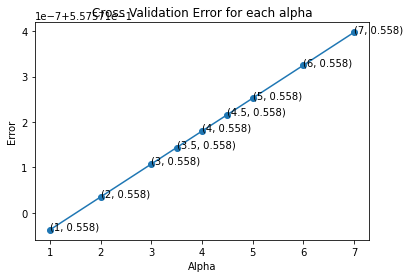

In [1036]:
from math import sqrt
from statsmodels.tools.eval_measures import mse
from sklearn.linear_model import Ridge

alpha = [1, 2, 3, 3.5, 4, 4.5, 5, 6, 7]
cv_rmsle_array=[]
for i in tqdm(alpha):
    model = Ridge(solver="sag", random_state=42, alpha=i)
    model.fit(X_train, y_train)
    preds_cv = model.predict(X_cv)
    cv_rmsle_array.append(sqrt(abs(mse(y_cv, preds_cv))))

for i in range(len(cv_rmsle_array)):
    print ('RMSLE for alpha = ',alpha[i],'is',cv_rmsle_array[i])

best_alpha = np.argmin(cv_rmsle_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_rmsle_array)
ax.scatter(alpha, cv_rmsle_array)
for i, txt in enumerate(np.round(cv_rmsle_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_rmsle_array[i]))

plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha")
plt.ylabel("Error")
plt.show()

In [1037]:
from numpy import mean
#alpha1 = [0.557570962640296, 0.5575710350527694, 0.5575711074803414, 0.5575711436997774, 0.5575711799229797, 0.5575712161499461, 0.5575712523806767, 0.5575713248534018, 0.5575713973412012]
#alpha2 = mean(alpha1)
print("Best alpha: ",  alpha[best_alpha])
model = Ridge(solver="sag", random_state=42, alpha=alpha[best_alpha])
model.fit(X_train, y_train)
ridge_preds_tr = model.predict(X_train)
ridge_preds_cv = model.predict(X_cv)
#ridge_preds_te = model.predict(X_test)

print('Train RMSLE:', sqrt(mse(y_train, ridge_preds_tr)))

ridge_rmsle = sqrt(mse(y_cv, ridge_preds_cv))
print("Cross validation RMSLE: ", ridge_rmsle)

Best alpha:  1
Train RMSLE: 0.5509241030675949
Cross validation RMSLE:  0.557570962640296


In [1038]:
# from sklearn.feature_selection import SelectKBest, f_regression
#
# fselect = SelectKBest(f_regression, k=48000)
# train_features = fselect.fit_transform(train_sparse, y_train)
#
# cv_features = fselect.transform(cv_sparse)
# #test_features = fselect.transform(test_sparse)

### SVM Regression: implementing a Hyper parameter tuning using RandomSearchCV

RMSLE for C= 0.01 is 0.6639921686361279
RMSLE for C= 0.03 is 0.663701502467269
RMSLE for C= 0.1 is 0.6643406450042693
RMSLE for C= 0.3 is 0.6258183070957117
RMSLE for C= 1 is 1.0647530922212414
RMSLE for C= 3 is 1.0283376018132808
RMSLE for C= 10 is 0.88637712410413


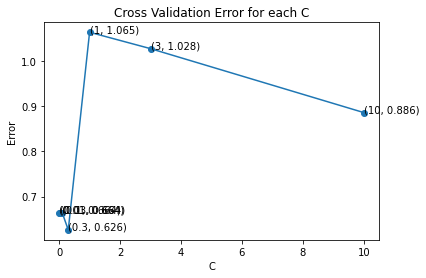

In [1039]:
c_param = [0.01, 0.03, 0.1, 0.3, 1, 3, 10]
cv_rmsle_array=[]

for i in c_param:
    model = SVR(C=i, max_iter=200)
    model.fit(X_train, y_train)
    preds_cv = model.predict(X_cv)
    cv_err = sqrt(mse(y_cv, preds_cv))
    cv_rmsle_array.append(cv_err)

    print('RMSLE for C=',i, 'is', cv_err)

best_C = np.argmin(cv_rmsle_array)

fig, ax = plt.subplots()
ax.plot(c_param, cv_rmsle_array)
ax.scatter(c_param, cv_rmsle_array)
for i, txt in enumerate(np.round(cv_rmsle_array,3)):
    ax.annotate((c_param[i],np.round(txt,3)), (c_param[i],cv_rmsle_array[i]))
plt.title("Cross Validation Error for each C")
plt.xlabel("C")
plt.ylabel("Error")
plt.show()

In [1040]:
print('Best C: ', best_C)
model = SVR(C=best_C, max_iter=200)
model.fit(X_train, y_train)

svr_preds_tr = model.predict(X_train)
svr_preds_cv = model.predict(X_cv)
print('Train RMSLE:', sqrt(mse(y_train, svr_preds_tr)))

svr_rmsle = sqrt(mse(y_cv, svr_preds_cv))
print("Cross validation RMSLE: ", svr_rmsle)

Best C:  3
Train RMSLE: 1.073494544810849
Cross validation RMSLE:  1.0283376018132808


### RandomForest Regression: Hyper parameter using RandomSearchCV

RMSLE for N=10 is 0.46919287783414293	 elapsed time:0:00:00.068943
RMSLE for N=20 is 0.4557799683916563	 elapsed time:0:00:00.190464


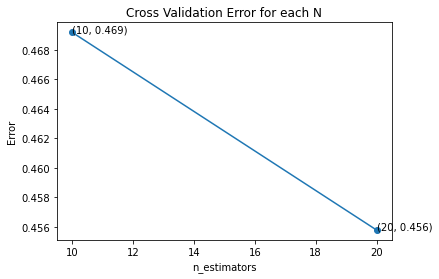

In [1041]:
import datetime

dt = datetime.datetime #to track time

estimators = [10, 20]
cv_rmsle_array=[]
t0 = dt.now()
for i in estimators:
    model = RandomForestRegressor(n_estimators=i, min_samples_split=10, max_features='sqrt', max_samples=0.9, random_state=42)
    model.fit(X_train, y_train)
    preds_cv = model.predict(X_cv)
    cv_err = sqrt(mse(y_cv, preds_cv))
    cv_rmsle_array.append(cv_err)

    print (f'RMSLE for N={i} is {cv_err}\t elapsed time:{dt.now() - t0}')

best_N = np.argmin(cv_rmsle_array)

fig, ax = plt.subplots()
ax.plot(estimators, cv_rmsle_array)
ax.scatter(estimators, cv_rmsle_array)
for i, txt in enumerate(np.round(cv_rmsle_array,3)):
    ax.annotate((estimators[i],np.round(txt,3)), (estimators[i],cv_rmsle_array[i]))
plt.title("Cross Validation Error for each N")
plt.xlabel("n_estimators")
plt.ylabel("Error")
plt.show()

In [1042]:
best_N = estimators[best_N]
print('Best n_estimators: ', best_N)
model = RandomForestRegressor(n_estimators=best_N, min_samples_split=10, max_features='sqrt', max_samples=0.9, random_state=42)
model.fit(X_train, y_train)

Best n_estimators:  20


RandomForestRegressor(max_features='sqrt', max_samples=0.9,
                      min_samples_split=10, n_estimators=20, random_state=42)

 Check the results of this implementation

In [1043]:
rf_preds_tr = model.predict(X_train)
rf_preds_cv = model.predict(X_cv)
# rf_preds_te = model.predict(X_test)

print('Train RMSLE:', sqrt(mse(y_train, rf_preds_tr)))

rf_rmsle = sqrt(mse(y_cv, rf_preds_cv))
print("Cross validation RMSLE: ", rf_rmsle)

Train RMSLE: 0.23636501342811905
Cross validation RMSLE:  0.4557799683916563


### LightGBM Regression
Hyper parameter tuning using RandomizedSearchCV

In [1044]:
# from sklearn.model_selection import RandomizedSearchCV, KFold
# from lightgbm import LGBMRegressor
# from random import uniform
# from scipy.stats import randint as sp_randint
# lgb_model = LGBMRegressor(subsample=0.9)
#
# params = {'learning_rate': uniform(0, 0.1),
#           'n_estimators': sp_randint(200, 1500),
#           'num_leaves': sp_randint(20, 200),
#           'max_depth': sp_randint(2, 15),
#           'min_child_weight': uniform(0, 2),
#           'colsample_bytree': uniform(0, 1),
#           }
# lgb_random = RandomizedSearchCV(lgb_model, param_distributions=params, n_iter=10, cv=3, random_state=42,
#                                 scoring='neg_root_mean_squared_error', verbose=10, return_train_score=True)
# lgb_random = lgb_random.fit(X_train, y_train)
#
# best_params = lgb_random.best_params_
# print(best_params)

In [1045]:
from sklearn.model_selection import GridSearchCV, KFold
import lightgbm as lgbm
# LightGBM Grid Search
params = {
    'task' : 'train',
    'objective' : 'regression',
    'subsample' : 0.8,
    'max_depth' : 7
}

param_grid = {
    'learning_rate': [0.1],
    'feature_fraction' : [0.5, 0.8],
    'num_leaves':[31, 63, 127]
}

kfold = KFold(n_splits=10, random_state = 77, shuffle = True)

lgbm_model = lgbm.LGBMRegressor(**params, verbose=-1)

lgbm_grid  = GridSearchCV(lgbm_model,
                          param_grid,
                          cv=kfold,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

lgbm_grid.fit(X_train, y_train)


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGB

GridSearchCV(cv=KFold(n_splits=10, random_state=77, shuffle=True),
             estimator=LGBMRegressor(max_depth=7, objective='regression',
                                     subsample=0.8, task='train', verbose=-1),
             param_grid={'feature_fraction': [0.5, 0.8], 'learning_rate': [0.1],
                         'num_leaves': [31, 63, 127]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [1046]:
print( "R2 SCORE", (r2_score(lgbm_grid.predict(X_train), y_train)))

R2 SCORE 0.9340690580181542


In [1047]:
lgbm_model.fit(X_train,y_train)

LGBMRegressor(max_depth=7, objective='regression', subsample=0.8, task='train',
              verbose=-1)

In [1048]:
#ids = test_ID
predictions =lgbm_model.predict(X_cv)
unlogged = np.expm1(predictions)
output = pd.DataFrame({ 'SalePrice': predictions , 'Proper Price' : unlogged})
output.to_csv('submission.csv', index=False)

In [1049]:
test_index

Int64Index([521, 737, 740, 660, 411, 678, 626, 513, 859, 136,
            ...
            948, 829, 656, 199, 213, 408, 332, 208, 613,  78],
           dtype='int64', length=200)

## Extension- ARIMA

In [1050]:
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

import warnings
from statsmodels.tsa.arima_model import ARIMA
warnings.filterwarnings("ignore")


In [1051]:
hist_df = pd.read_csv("Datasets/Domain 2021-2016/domain_properties.csv", parse_dates=['date_sold'], dayfirst=True)
data = pd.DataFrame(zip(hist_df.date_sold, hist_df.price), columns =['Date', 'Price']).dropna(thresh=2).reset_index(drop= True)
data.head(1000)

,Date,Price
0,2016-01-13,530000
1,2016-01-13,525000
2,2016-01-13,480000
3,2016-01-13,452000
4,2016-01-13,365500
...,...,...
995,2016-12-15,901000
996,2016-12-15,825000
997,2016-12-15,470000
998,2016-12-15,385000


In [1052]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11160 entries, 0 to 11159
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    11160 non-null  datetime64[ns]
 1   Price   11160 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 174.5 KB


In [1053]:
data1_drop = data.dropna(thresh=2)
data1_drop.reset_index(drop = True)

,Date,Price
0,2016-01-13,530000
1,2016-01-13,525000
2,2016-01-13,480000
3,2016-01-13,452000
4,2016-01-13,365500
...,...,...
11155,2021-12-31,1900000
11156,2021-12-31,1300000
11157,2021-12-31,1025000
11158,2022-01-01,1087500


In [1054]:
data_month = data
data_month

,Date,Price
0,2016-01-13,530000
1,2016-01-13,525000
2,2016-01-13,480000
3,2016-01-13,452000
4,2016-01-13,365500
...,...,...
11155,2021-12-31,1900000
11156,2021-12-31,1300000
11157,2021-12-31,1025000
11158,2022-01-01,1087500


In [1055]:
data_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11160 entries, 0 to 11159
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    11160 non-null  datetime64[ns]
 1   Price   11160 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 174.5 KB


### Stationary info

In [1056]:
monthly_mean = data_month.resample('M', on='Date').count()
tf = pd.DataFrame(monthly_mean['Price'])
monthly_mean.head(200)

,Date,Price
Date,,
2016-01-31,45,45
2016-02-29,73,73
2016-03-31,62,62
2016-04-30,59,59
2016-05-31,73,73
...,...,...
2021-09-30,464,464
2021-10-31,946,946
2021-11-30,1242,1242


In [1057]:
tf

,Price
Date,
2016-01-31,45
2016-02-29,73
2016-03-31,62
2016-04-30,59
2016-05-31,73
...,...
2021-09-30,464
2021-10-31,946
2021-11-30,1242


In [1058]:
monthly_mean = data_month.resample('M', on='Date').sum()
monthly_mean['Count'] = tf['Price']
monthly_mean

,Price,Count
Date,,
2016-01-31,41328000,45
2016-02-29,84524000,73
2016-03-31,69065950,62
2016-04-30,58926388,59
2016-05-31,89596580,73
...,...,...
2021-09-30,985113802,464
2021-10-31,1943838770,946
2021-11-30,2421488431,1242


In [1059]:
monthly_mean['AVG'] = round(monthly_mean.Price/monthly_mean.Count)
monthly_mean

,Price,Count,AVG
Date,,,
2016-01-31,41328000,45,918400.0
2016-02-29,84524000,73,1157863.0
2016-03-31,69065950,62,1113967.0
2016-04-30,58926388,59,998752.0
2016-05-31,89596580,73,1227350.0
...,...,...,...
2021-09-30,985113802,464,2123090.0
2021-10-31,1943838770,946,2054798.0
2021-11-30,2421488431,1242,1949669.0


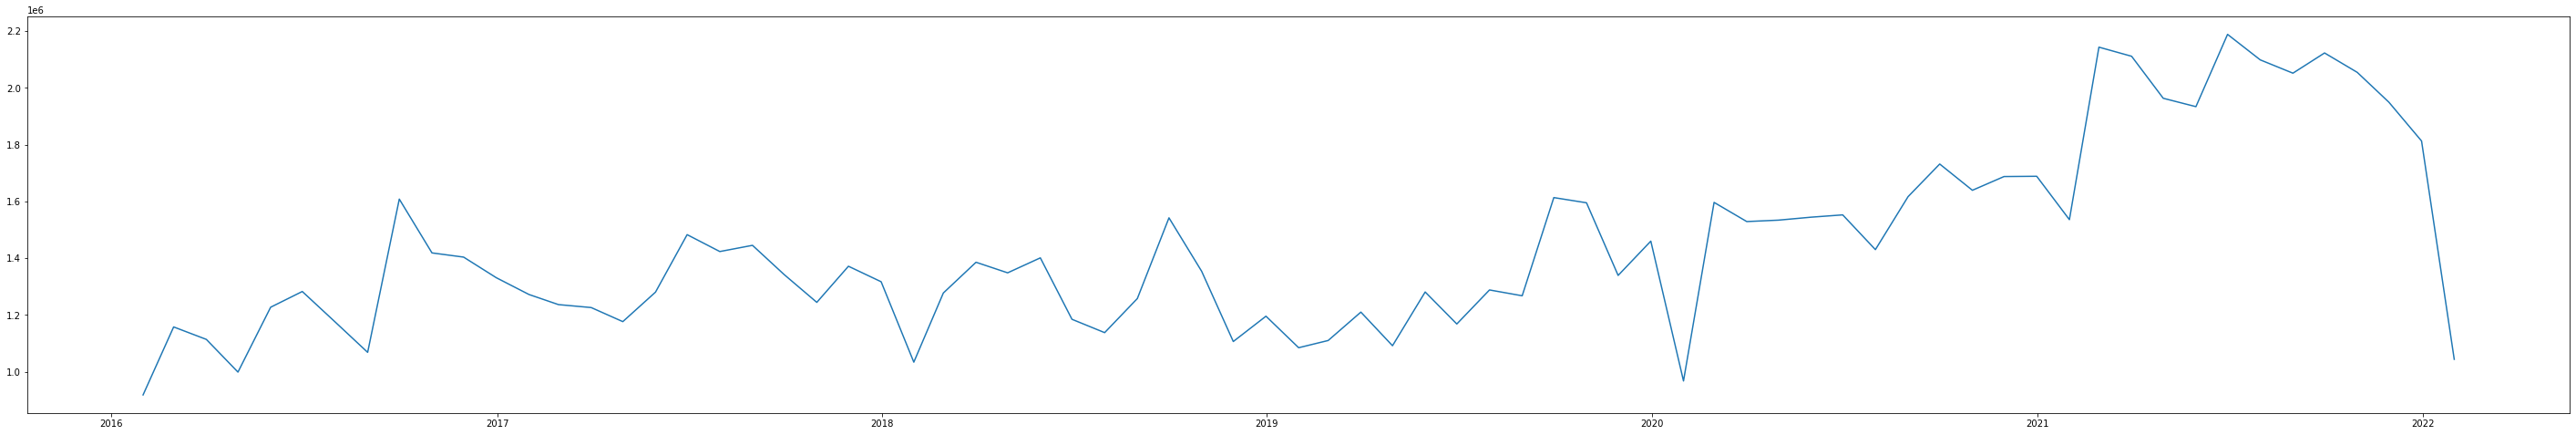

,Date,Price
0,2016-01-31,918400.0
1,2016-02-29,1157863.0
2,2016-03-31,1113967.0
3,2016-04-30,998752.0
4,2016-05-31,1227350.0
...,...,...
68,2021-09-30,2123090.0
69,2021-10-31,2054798.0
70,2021-11-30,1949669.0
71,2021-12-31,1812913.0


In [1060]:
plt.figure(figsize=(50,8))
plt.plot(monthly_mean.index, monthly_mean['AVG'])
plt.show()
state_month = data_month.resample('M', on='Date').mean().reset_index()
state_month['Price'] = round(state_month.Price)
state_month.head(200)

## First Order

In [1061]:
first_order=state_month.Price.diff()

fo=list(first_order)
state_month["first_order"]=fo
state_month

,Date,Price,first_order
0,2016-01-31,918400.0,NaN
1,2016-02-29,1157863.0,239463.0
2,2016-03-31,1113967.0,-43896.0
3,2016-04-30,998752.0,-115215.0
4,2016-05-31,1227350.0,228598.0
...,...,...,...
68,2021-09-30,2123090.0,71199.0
69,2021-10-31,2054798.0,-68292.0
70,2021-11-30,1949669.0,-105129.0
71,2021-12-31,1812913.0,-136756.0


In [1062]:
from statsmodels.tsa.stattools import adfuller

print("Observations of Dickey-fuller test")
dftest = adfuller(state_month.Price,autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

# df-test or adf test?

Observations of Dickey-fuller test
Test Statistic                 -3.064614
p-value                         0.029285
#lags used                      0.000000
number of observations used    72.000000
critical value (1%)            -3.524624
critical value (5%)            -2.902607
critical value (10%)           -2.588679
dtype: float64


### First order stationary

In [1063]:
print("Observations of First Order Dickey-fuller test")
dftest = adfuller(first_order[1:116],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Observations of First Order Dickey-fuller test
Test Statistic                -1.021523e+01
p-value                        5.503793e-18
#lags used                     0.000000e+00
number of observations used    7.100000e+01
critical value (1%)           -3.526005e+00
critical value (5%)           -2.903200e+00
critical value (10%)          -2.588995e+00
dtype: float64


## ARIMA Implementation

In [1064]:
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [1065]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)

                try:
                    model = ARIMA(dataset, order=order)
                    model_fit = model.fit(disp=0)
                    aic = model_fit.aic
                    if aic < best_score:
                        best_score, best_cfg = aic, order
                    print('ARIMA%s AIC=%.3f' % (order,aic))
                except:
                    continue
    print('Best ARIMA%s AIC=%.3f' % (best_cfg, best_score))

In [1066]:
# use orginal time series (non stationary)

p_value = range(0,5)
d_value = range(0,2)
q_value = range(0,5)
evaluate_models(state_month['Price'],p_value,d_value,q_value)

ARIMA(0, 0, 0) AIC=2059.833
ARIMA(0, 0, 1) AIC=2024.692
ARIMA(0, 0, 2) AIC=2014.279
ARIMA(0, 0, 3) AIC=2006.331
ARIMA(0, 0, 4) AIC=2006.161
ARIMA(0, 1, 0) AIC=1972.014
ARIMA(0, 1, 1) AIC=1965.782
ARIMA(0, 1, 2) AIC=1967.139
ARIMA(0, 1, 3) AIC=1969.132
ARIMA(0, 1, 4) AIC=1970.985
ARIMA(1, 0, 0) AIC=1994.814
ARIMA(1, 1, 0) AIC=1968.395
ARIMA(2, 0, 0) AIC=1993.947
ARIMA(2, 1, 0) AIC=1968.214
ARIMA(3, 0, 0) AIC=1994.971
ARIMA(3, 1, 0) AIC=1969.739
ARIMA(4, 0, 0) AIC=1996.929
ARIMA(4, 1, 0) AIC=1971.182
Best ARIMA(0, 1, 1) AIC=1965.782


What are optimal p,d,q values

In [1067]:
# use first order time series (sationary)
p_value = range(0,10)
d_value = range(0,2)
q_value = range(0,10)
evaluate_models(state_month.first_order,p_value,d_value,q_value)

ARIMA(0, 0, 0) AIC=nan
ARIMA(0, 1, 0) AIC=nan
Best ARIMANone AIC=inf


In [1068]:
train = state_month[0:int(len(state_month)*.8)]
test = state_month[int(len(state_month)*.8):len(state_month)]
#df1
train

,Date,Price,first_order
0,2016-01-31,918400.0,NaN
1,2016-02-29,1157863.0,239463.0
2,2016-03-31,1113967.0,-43896.0
3,2016-04-30,998752.0,-115215.0
4,2016-05-31,1227350.0,228598.0
5,2016-06-30,1282697.0,55347.0
6,2016-07-31,1175918.0,-106779.0
7,2016-08-31,1068308.0,-107610.0
8,2016-09-30,1608226.0,539918.0
9,2016-10-31,1418671.0,-189555.0


## ARIMA with non stationary data

In [1069]:
# 4,1,0 ARIMA Model (non stationary data) MIGHT WANT TO TRY  0,1,1
model = ARIMA(train.Price, order=(4,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                   57
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -764.219
Method:                       css-mle   S.D. of innovations         160053.894
Date:                Sat, 12 Mar 2022   AIC                           1540.438
Time:                        03:58:40   BIC                           1552.696
Sample:                             1   HQIC                          1545.202
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.124e+04   8716.650      1.290      0.197   -5840.378    2.83e+04
ar.L1.D.Price    -0.5697      0.130     -4.382      0.000      -0.825      -0.315
ar.L2.D.Price    -0.4018      0.144     

In [1070]:
fc, se, conf = model_fit.forecast(len(test), alpha=0.05)
fc_series = pd.Series(fc, index=test.index)
MSE = mean_squared_error(test.Price, fc_series)
RMSE = np.sqrt(MSE)
MSE,RMSE

(117266793666.75928, 342442.3946691754)

In [1071]:
# MAPE and SMAPE
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))

In [1072]:
mape_arima = mape(test.Price, fc_series)
mape_arima

0.16369590696050018

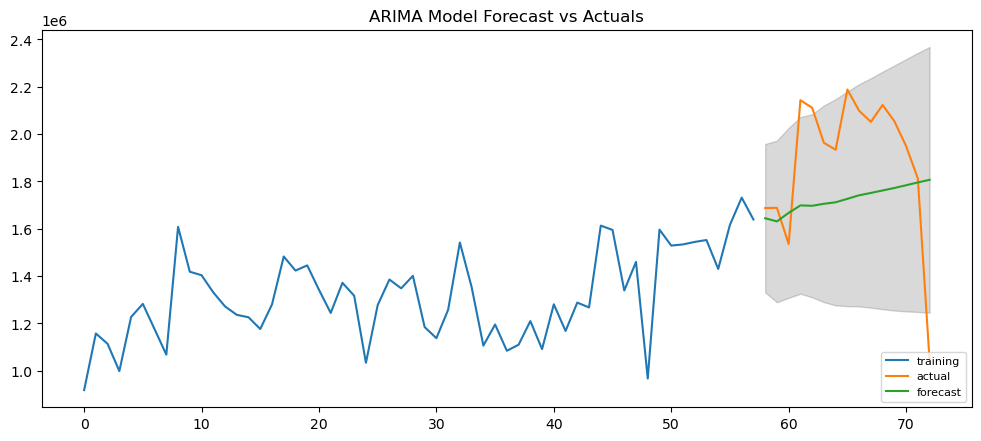

<Figure size 432x288 with 0 Axes>

In [1073]:
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.Price, label='training')
plt.plot(test.Price, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('ARIMA Model Forecast vs Actuals')
plt.legend(loc='lower right', fontsize=8)
plt.show()
plt.savefig('ARIMA Forecast vs Actuals use non stationary data')

## SARIMA

In [1074]:
sarima_model =  auto_arima(train['Price'],start_p=0, d=1, start_q=0,
                           max_p=5, max_d=5, max_q=5, start_P=0,
                           D=1, start_Q=0, max_P=5, max_D=5,
                           max_Q=5, m=12, seasonal=True,
                           error_action='warn',trace = True,
                           supress_warnings=True,stepwise = True,
                           random_state=20,n_fits = 20 )
print(sarima_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1238.535, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1227.886, Time=0.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1224.966, Time=0.06 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1237.870, Time=0.02 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1226.706, Time=0.11 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1226.572, Time=0.14 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1227.067, Time=0.04 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1228.408, Time=0.32 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.08 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1226.418, Time=0.07 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=1226.180, Time=0.05 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1225.717, Time=0.06 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=1227.229, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=1226.704, Time=0.07 sec

Best model:  ARIMA(0,1,

In [1075]:
sarima_model = SARIMAX(train.Price, order=(0,1,1),seasonal_order=(0,1,1,12))
sarima_model_fit = sarima_model.fit(disp=0)
print(sarima_model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                   58
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -609.483
Date:                            Sat, 12 Mar 2022   AIC                           1224.966
Time:                                    03:58:41   BIC                           1230.386
Sample:                                         0   HQIC                          1226.987
                                             - 58                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2802      0.132     -2.129      0.033      -0.538      -0.022
ma.S.L12      -0.5213      0.146   

In [1076]:
sarima_fc_series = sarima_model_fit.forecast(len(test), alpha=0.05)
MSE_sarima = mean_squared_error(test.Price, sarima_fc_series)
RMSE_sarima = np.sqrt(MSE_sarima)
MSE_sarima,RMSE_sarima

(127297423519.64421, 356787.6448528511)

In [1077]:
mape_sarima = mape(test.Price, sarima_fc_series)
mape_sarima

0.17784189590104396

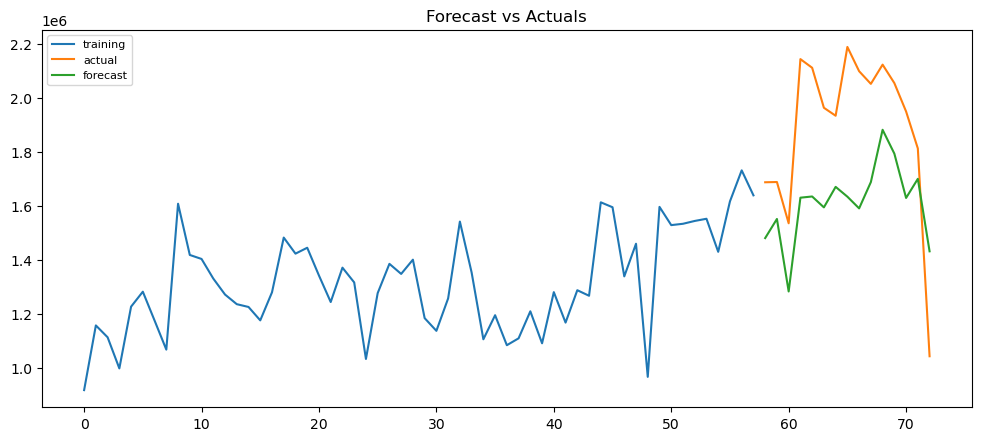

<Figure size 432x288 with 0 Axes>

In [1078]:
sarima_fc_series = pd.Series(sarima_fc_series, index=test.index)


# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.Price, label='training')
plt.plot(test.Price, label='actual')
plt.plot(sarima_fc_series, label='forecast')

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
plt.savefig('SARIMA Forecast vs Actuals use non stationary data')

### must used stationary info as well

In [1079]:
sarima_model_fist =  auto_arima(train['first_order'].dropna(),start_p=0, d=1, start_q=0,
                                max_p=5, max_d=5, max_q=5, start_P=0,
                                D=1, start_Q=0, max_P=5, max_D=5,
                                max_Q=5, m=12, seasonal=True,
                                error_action='warn',trace = True,
                                supress_warnings=True,stepwise = True,
                                random_state=20,n_fits = 20 )
print(sarima_model_fist.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1254.381, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1215.308, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1206.433, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1214.693, Time=0.03 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1205.540, Time=0.10 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1204.108, Time=0.05 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1205.446, Time=0.13 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=1207.436, Time=0.25 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1232.576, Time=0.03 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=1202.679, Time=0.09 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1213.020, Time=0.05 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1203.933, Time=0.18 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1204.018, Time=0.12 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1204.745, Time=0.07 sec
 ARIMA(1,1,1)(2,1,1

In [1080]:
sarima_model_first = SARIMAX(train.first_order.dropna(), order=(4,1,0),seasonal_order=(1,1,0,12))
sarima_model_first_fit = sarima_model_first.fit(disp=0)
print(sarima_model_first_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        first_order   No. Observations:                   57
Model:             SARIMAX(4, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -591.882
Date:                            Sat, 12 Mar 2022   AIC                           1195.764
Time:                                    03:58:49   BIC                           1206.469
Sample:                                         0   HQIC                          1199.734
                                             - 57                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1508      0.397     -2.896      0.004      -1.930      -0.372
ar.L2         -0.8559      0.428   

In [1081]:
sarima_fc_first_series = sarima_model_first_fit.forecast(len(test), alpha=0.05)
error_sarima_first = mean_squared_error(test.first_order.dropna(), sarima_fc_first_series)
error_sarima_first

55390744036.12542

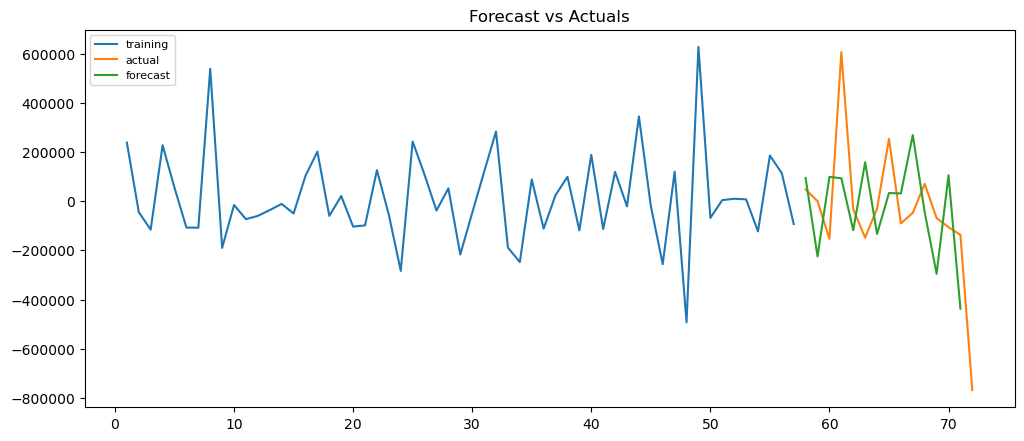

<Figure size 432x288 with 0 Axes>

In [1082]:
sarima_fc_first_series = pd.Series(sarima_fc_first_series, index=test.index)


# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.first_order.dropna(), label='training')
plt.plot(test.first_order.dropna(), label='actual')
plt.plot(sarima_fc_first_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
plt.savefig('SARIMA Forecast vs Actuals use stationary data')

## Prophet

In [1083]:
import pystan as pt
from fbprophet import Prophet

In [1084]:
sales_pr = state_month.drop('first_order', axis= 1)
sales_pr.columns = ['ds','y'] # To use prophet column names should be like that
holding_values = sales_pr
train_data_pr = sales_pr[:int(len(sales_pr)*.8)]
test_data_pr = sales_pr[int(len(sales_pr)*.2):]

In [1085]:
from fbprophet import Prophet
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=24,freq='MS')
prophet_pred = m.predict(future)
prophet_pred.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
77,2022-06-01,1.736950e+06,1.560300e+06,1.843230e+06,1.715954e+06,1.758365e+06,-34146.177262,-34146.177262,-34146.177262,-34146.177262,-34146.177262,-34146.177262,0.0,0.0,0.0,1.702804e+06
78,2022-07-01,1.748169e+06,1.827944e+06,2.098869e+06,1.725119e+06,1.771036e+06,208520.118831,208520.118831,208520.118831,208520.118831,208520.118831,208520.118831,0.0,0.0,0.0,1.956689e+06
79,2022-08-01,1.759762e+06,1.591705e+06,1.857704e+06,1.735010e+06,1.783734e+06,-35902.198631,-35902.198631,-35902.198631,-35902.198631,-35902.198631,-35902.198631,0.0,0.0,0.0,1.723860e+06
80,2022-09-01,1.771355e+06,1.656972e+06,1.920228e+06,1.744806e+06,1.797099e+06,16532.735656,16532.735656,16532.735656,16532.735656,16532.735656,16532.735656,0.0,0.0,0.0,1.787887e+06
81,2022-10-01,1.782574e+06,1.837205e+06,2.110179e+06,1.754856e+06,1.810347e+06,196220.627646,196220.627646,196220.627646,196220.627646,196220.627646,196220.627646,0.0,0.0,0.0,1.978794e+06


In [1086]:
prophet_pred.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
52,2020-05-31,1.463585e+06,1.342690e+06,1.612843e+06,1.463585e+06,1.463585e+06,9488.527934,9488.527934,9488.527934,9488.527934,9488.527934,9488.527934,0.0,0.0,0.0,1.473073e+06
53,2020-06-30,1.474803e+06,1.422130e+06,1.694238e+06,1.474803e+06,1.474803e+06,87564.341907,87564.341907,87564.341907,87564.341907,87564.341907,87564.341907,0.0,0.0,0.0,1.562368e+06
54,2020-07-31,1.486396e+06,1.319156e+06,1.587336e+06,1.486396e+06,1.486396e+06,-36781.022978,-36781.022978,-36781.022978,-36781.022978,-36781.022978,-36781.022978,0.0,0.0,0.0,1.449615e+06
55,2020-08-31,1.497989e+06,1.365490e+06,1.646111e+06,1.497989e+06,1.497989e+06,4576.377386,4576.377386,4576.377386,4576.377386,4576.377386,4576.377386,0.0,0.0,0.0,1.502565e+06
56,2020-09-30,1.509208e+06,1.594908e+06,1.863313e+06,1.509208e+06,1.509208e+06,216297.045122,216297.045122,216297.045122,216297.045122,216297.045122,216297.045122,0.0,0.0,0.0,1.725505e+06
57,2020-10-31,1.520801e+06,1.441892e+06,1.709930e+06,1.520801e+06,1.520801e+06,53445.195384,53445.195384,53445.195384,53445.195384,53445.195384,53445.195384,0.0,0.0,0.0,1.574246e+06
58,2020-11-01,1.521175e+06,1.251188e+06,1.527845e+06,1.521175e+06,1.521175e+06,-129882.054916,-129882.054916,-129882.054916,-129882.054916,-129882.054916,-129882.054916,0.0,0.0,0.0,1.391293e+06
59,2020-12-01,1.532393e+06,1.603986e+06,1.876740e+06,1.532312e+06,1.532465e+06,202860.257111,202860.257111,202860.257111,202860.257111,202860.257111,202860.257111,0.0,0.0,0.0,1.735254e+06
60,2021-01-01,1.543986e+06,1.201379e+06,1.463410e+06,1.543515e+06,1.544442e+06,-215762.893134,-215762.893134,-215762.893134,-215762.893134,-215762.893134,-215762.893134,0.0,0.0,0.0,1.328223e+06
61,2021-02-01,1.555579e+06,1.495105e+06,1.774754e+06,1.554568e+06,1.556565e+06,89739.263524,89739.263524,89739.263524,89739.263524,89739.263524,89739.263524,0.0,0.0,0.0,1.645318e+06


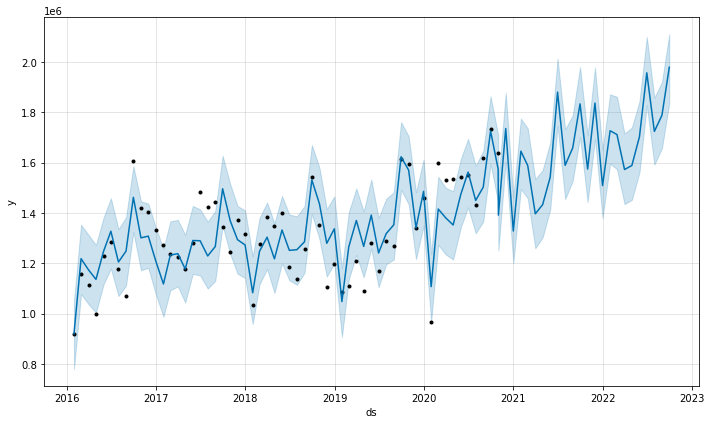

In [1087]:
m.plot(prophet_pred);

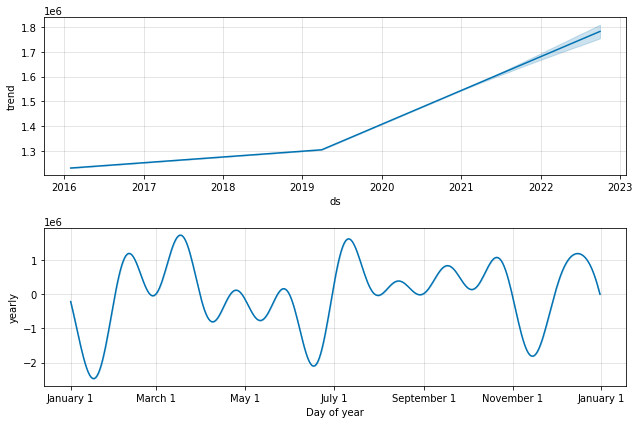

In [1088]:
fig = m.plot_components(prophet_pred)
plt.savefig('Prophet seasonal and train')

In [1089]:
#prophet_pred.join(sales_pr.set_index('ds').y).reset_index()

In [1090]:
metric_df = prophet_pred.set_index('ds')[['yhat']].join(test_data_pr.set_index('ds').y).reset_index()
metric_df

,ds,yhat,y
0,2016-01-31,9.191579e+05,NaN
1,2016-02-29,1.218390e+06,NaN
2,2016-03-31,1.173361e+06,NaN
3,2016-04-30,1.136165e+06,NaN
4,2016-05-31,1.247447e+06,NaN
...,...,...,...
77,2022-06-01,1.702804e+06,NaN
78,2022-07-01,1.956689e+06,NaN
79,2022-08-01,1.723860e+06,NaN
80,2022-09-01,1.787887e+06,NaN


In [1091]:
test_data_pr

,ds,y
14,2017-03-31,1226155.0
15,2017-04-30,1176567.0
16,2017-05-31,1280457.0
17,2017-06-30,1482992.0
18,2017-07-31,1423515.0
19,2017-08-31,1445342.0
20,2017-09-30,1342468.0
21,2017-10-31,1244472.0
22,2017-11-30,1371677.0
23,2017-12-31,1317082.0


In [1092]:
MSE_pro = mean_squared_error(metric_df.y[14:57], prophet_pred.yhat[14:57])
RMSE_pro = np.sqrt(MSE_pro)
MSE_pro,RMSE_pro
# inconstitencies
#Too large need to fix
#Covid is the reason for this error

(11561705933.306742, 107525.37343951306)

In [1093]:
mape = mape(test.Price, prophet_pred.yhat[60:81])
mape

0.21275748464113248

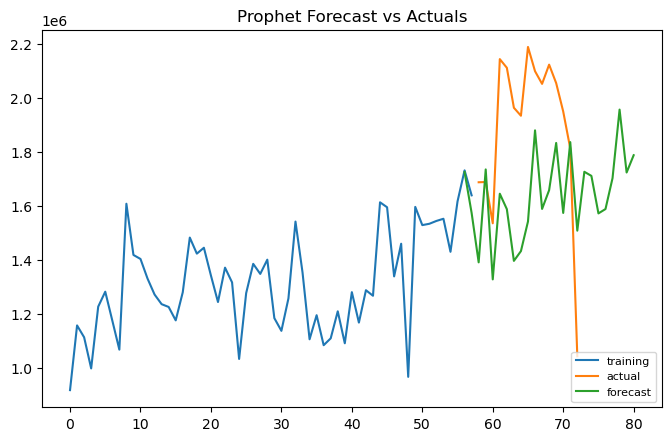

<Figure size 432x288 with 0 Axes>

In [1094]:
# Plot
plt.figure(figsize=(8,5), dpi=100)
plt.plot(train.Price, label='training')
plt.plot(test.Price, label='actual')
plt.plot(prophet_pred.yhat[56:81], label='forecast')
#plt.plot(ZHVI, label='ZHVI')


plt.title('Prophet Forecast vs Actuals')
plt.legend(loc='lower right', fontsize=8)
plt.show()
plt.savefig('Prophet Forecast vs Actuals')